In [35]:
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [36]:
path = Path('./')
df_meta = pd.read_csv(path / 'movie_meta.csv')
df_meta.set_index('id',inplace=True)
df_meta

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,toy story,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,7.7,5415.0
8844,jumanji,"['Adventure', 'Fantasy', 'Family']",65000000.0,262797249.0,6.9,2413.0
31357,waiting to exhale,"['Comedy', 'Drama', 'Romance']",16000000.0,81452156.0,6.1,34.0
949,heat,"['Action', 'Crime', 'Drama', 'Thriller']",60000000.0,187436818.0,7.7,1886.0
9091,sudden death,"['Action', 'Adventure', 'Thriller']",35000000.0,64350171.0,5.5,174.0
...,...,...,...,...,...,...
24049,சிவாஜி,"['Action', 'Comedy', 'Drama']",12000000.0,19000000.0,6.9,25.0
280422,все и сразу,"['Crime', 'Comedy']",750000.0,3.0,6.0,4.0
62757,dikari,"['Comedy', 'Drama']",800000.0,1328612.0,5.8,6.0


In [37]:
df_meta.explode('genres')

,original_title,genres,budget,revenue,vote_average,vote_count
id,,,,,,
862,toy story,"['Animation', 'Comedy', 'Family']",30000000.0,373554033.0,7.7,5415.0
8844,jumanji,"['Adventure', 'Fantasy', 'Family']",65000000.0,262797249.0,6.9,2413.0
31357,waiting to exhale,"['Comedy', 'Drama', 'Romance']",16000000.0,81452156.0,6.1,34.0
949,heat,"['Action', 'Crime', 'Drama', 'Thriller']",60000000.0,187436818.0,7.7,1886.0
9091,sudden death,"['Action', 'Adventure', 'Thriller']",35000000.0,64350171.0,5.5,174.0
...,...,...,...,...,...,...
24049,சிவாஜி,"['Action', 'Comedy', 'Drama']",12000000.0,19000000.0,6.9,25.0
280422,все и сразу,"['Crime', 'Comedy']",750000.0,3.0,6.0,4.0
62757,dikari,"['Comedy', 'Drama']",800000.0,1328612.0,5.8,6.0


In [38]:
df_meta.genres = df_meta.genres.apply(eval)
genres = df_meta.genres.apply(lambda x: x[0]).unique()
genres,genres.shape

(array(['Animation', 'Adventure', 'Comedy', 'Action', 'History', 'Drama',
        'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
        'Mystery', 'Thriller', 'Documentary', 'Family', 'War', 'Western',
        'Music', 'TV Movie', 'Foreign'], dtype=object),
 (20,))

In [39]:


def plot_avg_budget_revenue(df_x):
    # Explode the genres list to create separate rows for each genre
    df_exploded = df_x.explode('genres')

    # Calculate mean budget and revenue for each genre
    genre_stats = df_exploded.groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x - width/2, genre_stats['budget'], width, label='Budget', color='skyblue')
    plt.bar(x + width/2, genre_stats['revenue'], width, label='Revenue', color='lightgreen')

    plt.xlabel('Genres')
    plt.ylabel('Amount ($)')
    plt.title('Average Budget vs Revenue by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')
    plt.legend()

    # Format y-axis to millions
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}M' if x >= 1e6 else f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()


In [40]:
def plot_avg_vote_by_genre(df_x):
    # Explode the genres list to create separate rows for each genre
    df_exploded = df_x.explode('genres')

    # Calculate mean vote_average for each genre
    genre_stats = df_exploded.groupby('genres').agg({
        'vote_average': 'mean'
    }).reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 4))
    x = np.arange(len(genre_stats))
    width = 0.35

    plt.bar(x, genre_stats['vote_average'], width, color='skyblue')

    plt.xlabel('Genres')
    plt.ylabel('Average Vote Rating')
    plt.title('Average Vote Rating by Genre')
    plt.xticks(x, genre_stats['genres'], rotation=45, ha='right')

    # Add value labels on top of each bar
    for i, v in enumerate(genre_stats['vote_average']):
        plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

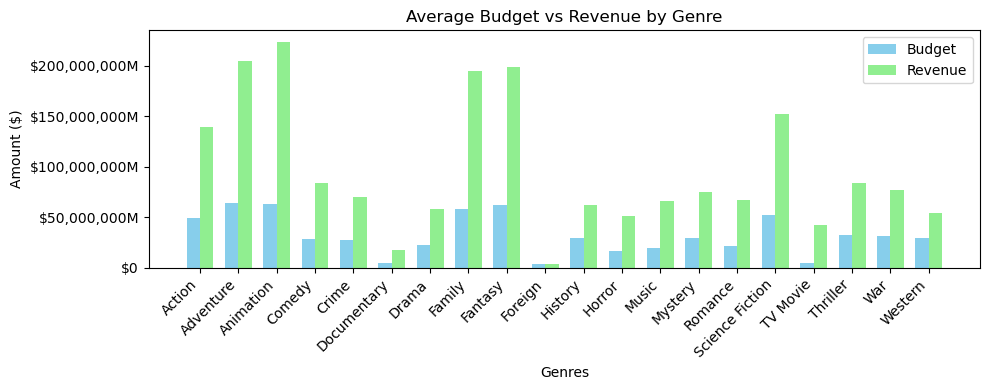

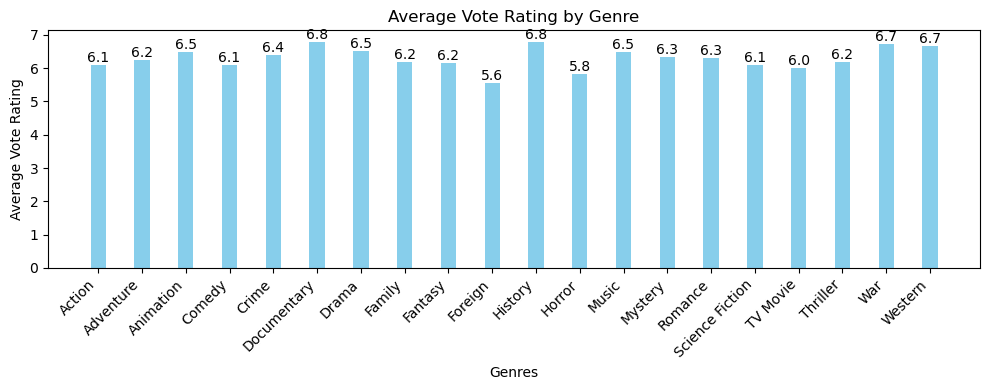

In [41]:
plot_avg_budget_revenue(df_meta)
plot_avg_vote_by_genre(df_meta)

# Central Limited Theeorem

In [42]:
# Demonstrate Central Limit Theorem by plotting distribution of sample means
n_bootstraps = 1000  # Increase number of samples for better demonstration
sample_size = 500    # Size of each sample
budget_means = []
revenue_means = []
vote_averages_means = []

# Generate multiple sample means
for i in range(n_bootstraps):
    # Take random sample and calculate mean budget and revenue for each genre
    sample = df_meta.sample(n=sample_size, replace=True)
    sample_means_budget = sample.explode('genres').groupby('genres')['budget'].mean()
    sample_means_revenue = sample.explode('genres').groupby('genres')['revenue'].mean()
    sample_means_vote_avg = sample.explode('genres').groupby('genres')['vote_average'].mean()
    budget_means.append(sample_means_budget)
    revenue_means.append(sample_means_revenue)
    vote_averages_means.append(sample_means_vote_avg)

# Convert lists to DataFrames
budget_means_df = pd.DataFrame(budget_means)
revenue_means_df = pd.DataFrame(revenue_means)
vote_averages_means_df = pd.DataFrame(vote_averages_means)




In [43]:
budget_means_df.fillna(0,inplace=True)
revenue_means_df.fillna(0,inplace=True)
vote_averages_means_df.fillna(0,inplace=True)

In [44]:
def plot_samples_genre_mean(df_meta,budget_means_df, revenue_means_df):
    # Calculate number of plots needed
    n_genres = len(budget_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 5
    
    # Get actual means from original df_meta for comparison
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'budget': 'mean',
        'revenue': 'mean'
    })
    
    # Plot histograms of sample means for each genre in groups of 5
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(budget_means_df.columns[start_idx:end_idx]):
            # Budget histogram
            axes[idx].hist(budget_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='skyblue', label='Sample Budget Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'budget'], color='blue', linestyle='--', label='Actual Budget Mean')
            
            # Revenue histogram
            axes[idx].hist(revenue_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightgreen', label='Sample Revenue Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'revenue'], color='green', linestyle='--', label='Actual Revenue Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Budget=${budget_means_df[genre].mean():,.0f}\n'
                               f'Sample Mean Revenue=${revenue_means_df[genre].mean():,.0f}\n'
                               f'Actual Mean Budget=${actual_means.loc[genre,"budget"]:,.0f}\n'
                               f'Actual Mean Revenue=${actual_means.loc[genre,"revenue"]:,.0f}')
            axes[idx].set_xlabel('Amount ($)')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()
 

In [45]:
def plot_samples_genre_mean_vote(df_meta, vote_averages_means_df):
    # Calculate number of plots needed
    n_genres = len(vote_averages_means_df.columns)
    n_plots = (n_genres + 9) // 10  # Round up to nearest multiple of 5
    
    # Get actual means from original df_meta for comparison
    actual_means = df_meta.explode('genres').groupby('genres').agg({
        'vote_average': 'mean'
    })
    
    # Plot histograms of sample means for each genre in groups of 5
    for i in range(n_plots):
        start_idx = i * 10
        end_idx = min(start_idx + 10, n_genres)
        
        fig, axes = plt.subplots(1, end_idx - start_idx, figsize=(40, 5))
        if end_idx - start_idx == 1:
            axes = [axes]  # Make axes iterable when only one subplot
            
        for idx, genre in enumerate(vote_averages_means_df.columns[start_idx:end_idx]):
            # Vote average histogram
            axes[idx].hist(vote_averages_means_df[genre].dropna(), bins=30, density=True, alpha=0.5, color='lightpink', label='Sample Vote Average Distribution')
            axes[idx].axvline(actual_means.loc[genre, 'vote_average'], color='red', linestyle='--', label='Actual Vote Average Mean')
            
            axes[idx].set_title(f'{genre}\nSample Mean Vote={vote_averages_means_df[genre].mean():.1f}\n'
                               f'Actual Mean Vote={actual_means.loc[genre,"vote_average"]:.1f}')
            axes[idx].set_xlabel('Vote Score')
            axes[idx].set_ylabel('Density')
            axes[idx].legend()
        
        plt.tight_layout()
        plt.show()

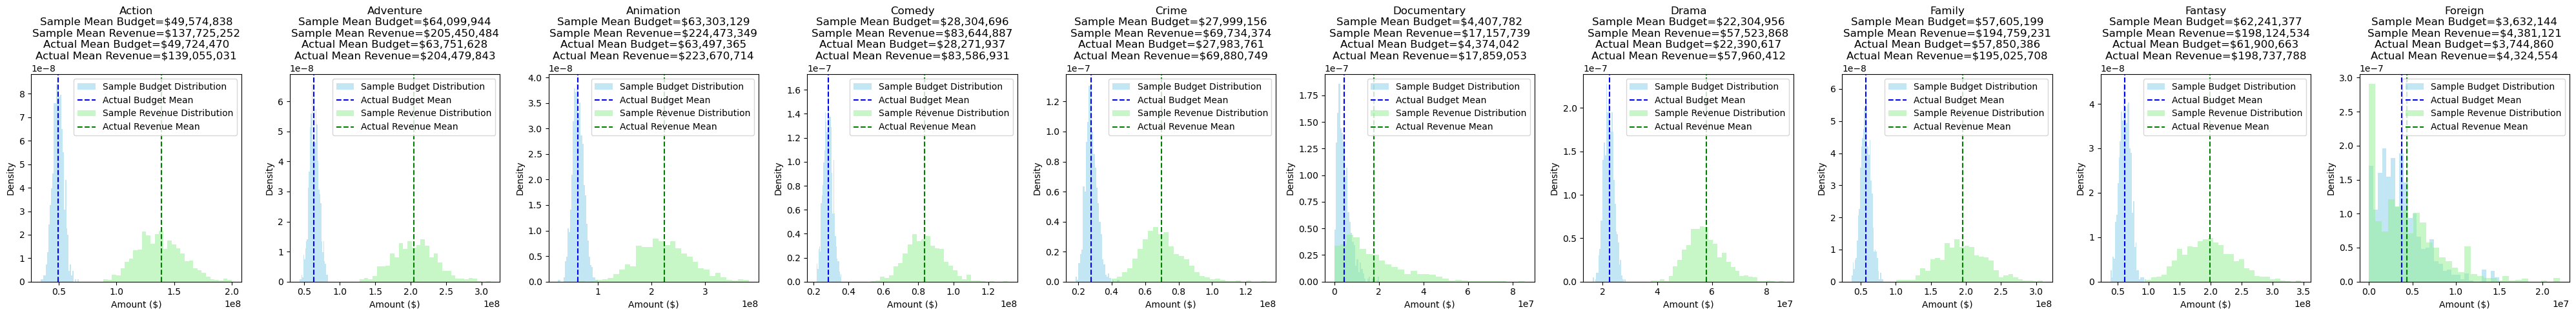

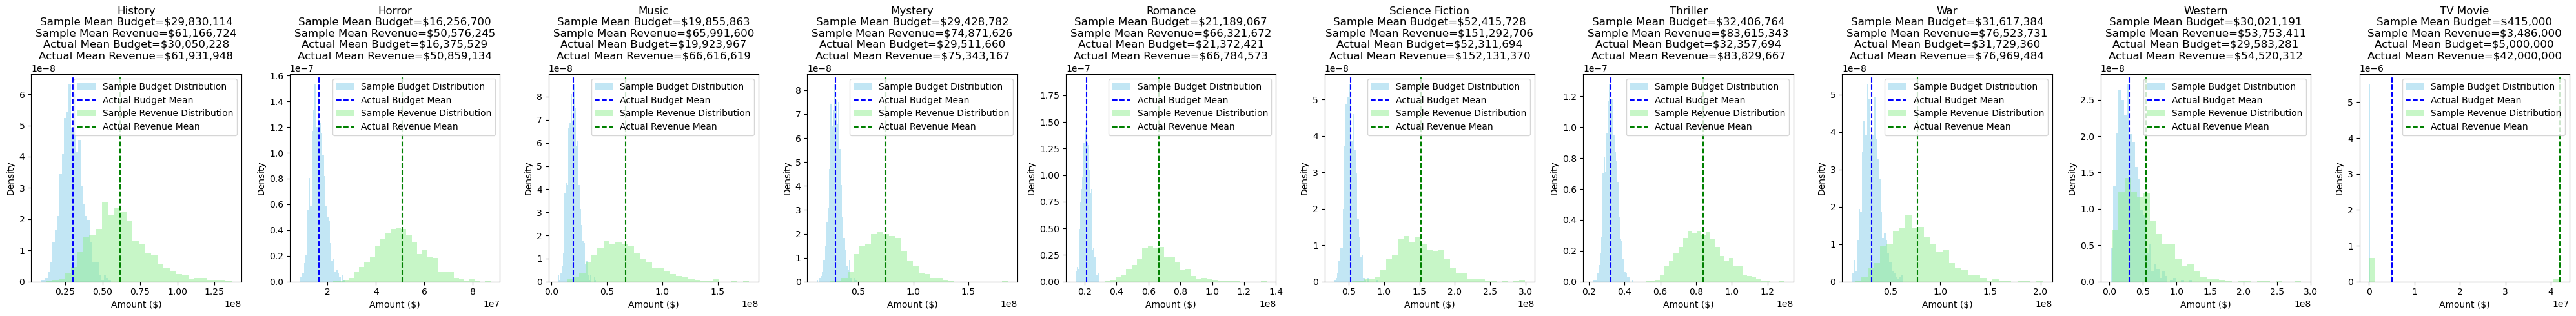

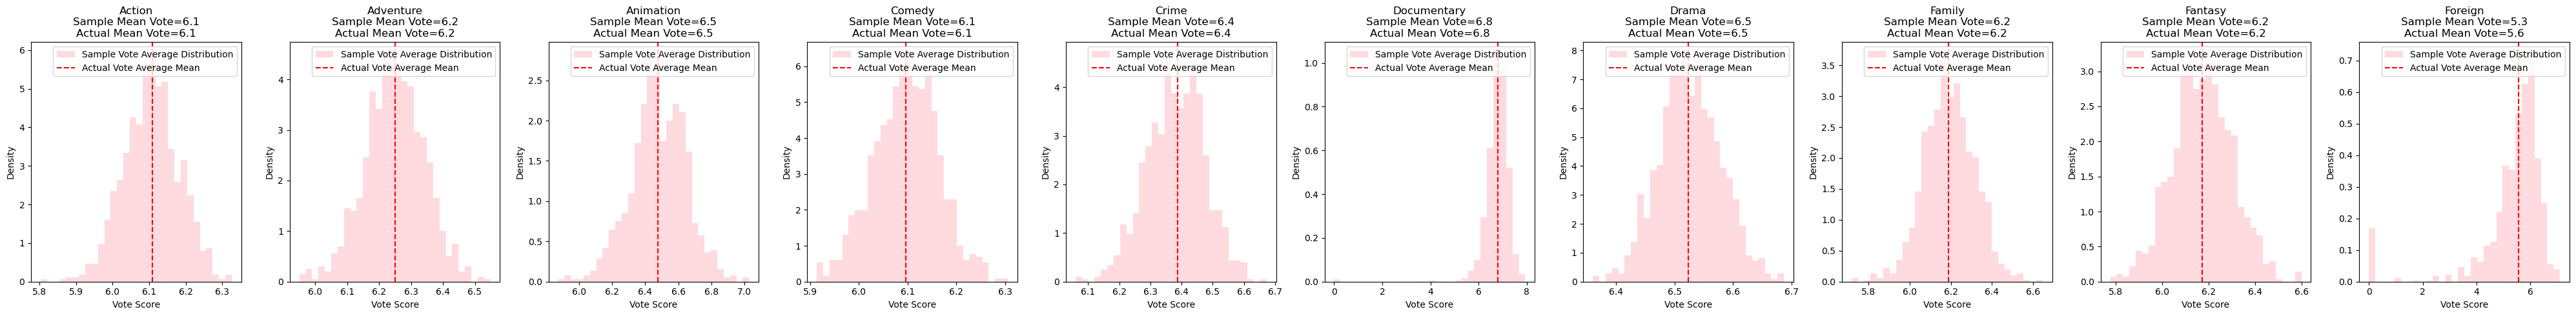

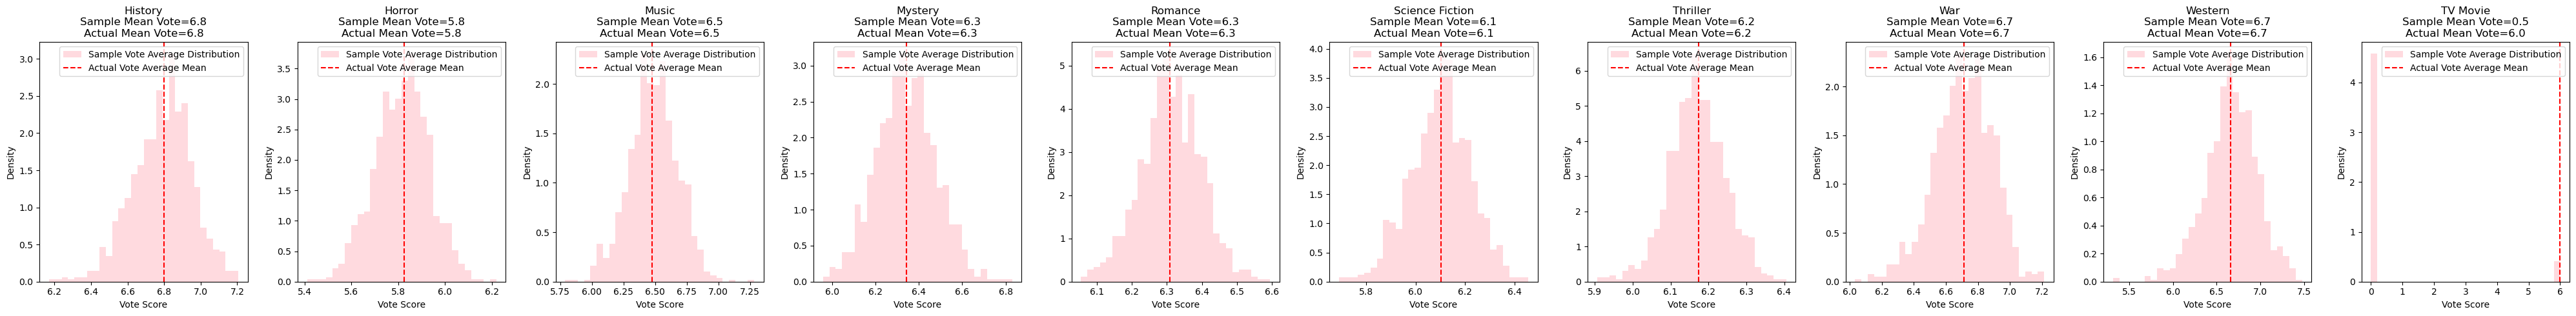

In [46]:
plot_samples_genre_mean(df_meta,budget_means_df,revenue_means_df)
plot_samples_genre_mean_vote(df_meta, vote_averages_means_df)

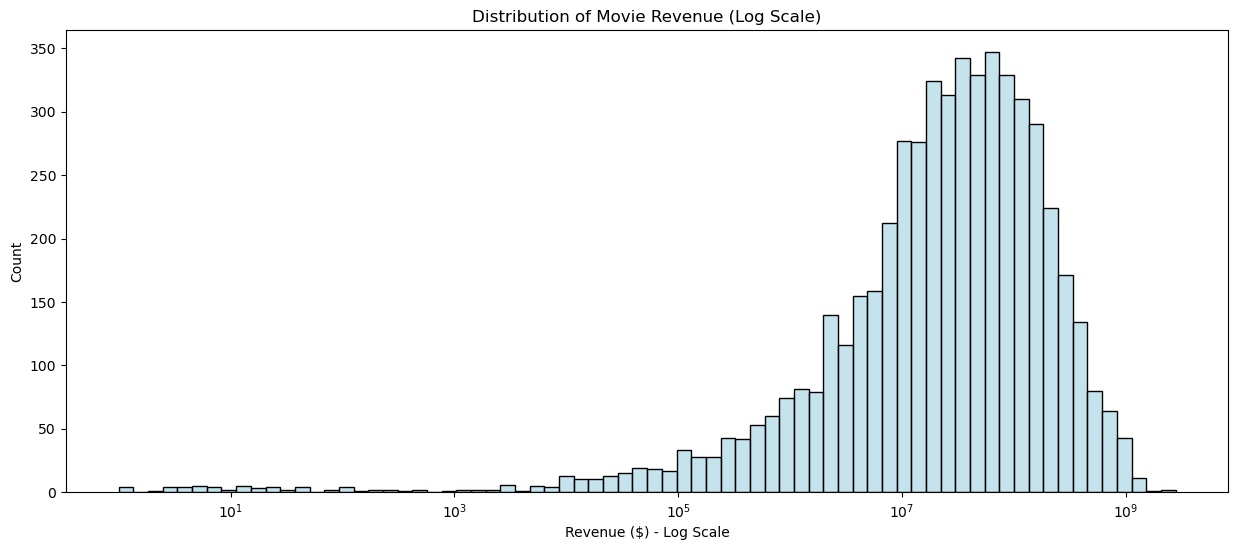

In [47]:
plt.figure(figsize=(15,6))
sns.histplot(data=df_meta, x='revenue', log_scale=True, color='lightblue', alpha=0.7)
plt.title('Distribution of Movie Revenue (Log Scale)')
plt.xlabel('Revenue ($) - Log Scale')
plt.ylabel('Count')
plt.show()


# Correlation
corelation -> budget revenue vote_average มีความสัมพันธ์กันมั้ย

In [48]:

from scipy import stats

cols = ['budget', 'revenue', 'vote_average']
df_sub = df_meta[cols]

corr_matrix = df_sub.corr()
print("Correlation matrix:")
print(corr_matrix)

# คำนวณ Pearson correlation coefficient พร้อม p-value สำหรับคู่ตัวแปรแต่ละคู่
print("\nDetailed correlation analysis with p-values:")
for i, col1 in enumerate(cols):
    for col2 in cols[i+1:]:
        r, p = stats.pearsonr(df_sub[col1], df_sub[col2])
        print(f"{col1} vs {col2}: r = {r:.2f}, p-value = {p:.3g}")

Correlation matrix:
                budget   revenue  vote_average
budget        1.000000  0.730089     -0.011970
revenue       0.730089  1.000000      0.167925
vote_average -0.011970  0.167925      1.000000

Detailed correlation analysis with p-values:
budget vs revenue: r = 0.73, p-value = 0
budget vs vote_average: r = -0.01, p-value = 0.381
revenue vs vote_average: r = 0.17, p-value = 3.2e-35


In [49]:
# Calculate standard error
SE = df_sub.revenue.std() / len(df_sub.revenue)**(1/2)

# Calculate confidence interval (95%)
confidence_level = 0.95
degrees_of_freedom = len(df_sub.revenue) - 1
t_value = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

margin_of_error = t_value * SE
confidence_interval = (df_sub.revenue.mean() - margin_of_error, 
                      df_sub.revenue.mean() + margin_of_error)

print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

95% Confidence Interval: (86118492.87, 95023224.24)


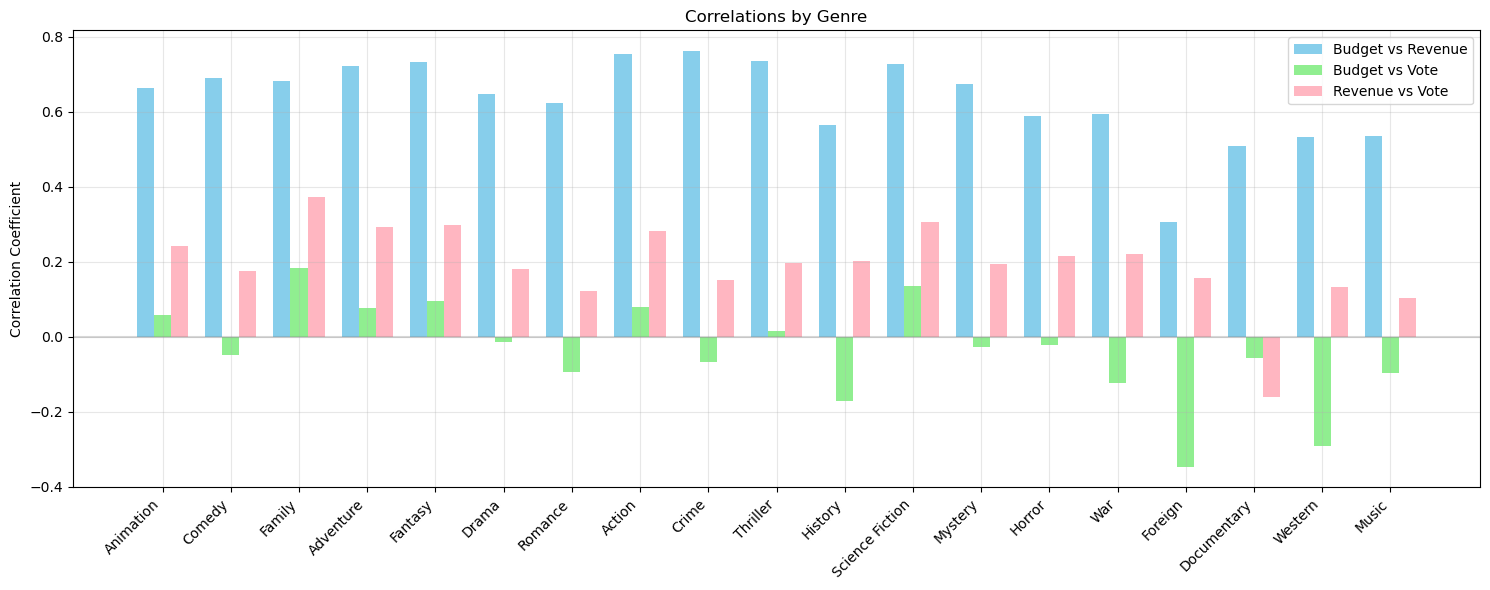

In [50]:
# Calculate correlations for each genre and visualize
df_exploded = df_meta.explode('genres')
genres = df_exploded['genres'].unique()

# Initialize lists to store correlations
budget_revenue_corr = []
budget_vote_corr = []
revenue_vote_corr = []
genre_names = []

# Calculate correlations for each genre
for genre in genres:
    genre_data = df_exploded[df_exploded['genres'] == genre][['budget', 'revenue', 'vote_average']]
    
    if len(genre_data) > 2:
        # Calculate correlations
        corr_matrix = genre_data.corr()
        budget_revenue_corr.append(corr_matrix.loc['budget', 'revenue'])
        budget_vote_corr.append(corr_matrix.loc['budget', 'vote_average'])
        revenue_vote_corr.append(corr_matrix.loc['revenue', 'vote_average'])
        genre_names.append(genre)

# Create figure
fig, ax = plt.subplots(figsize=(15, 6))

# Set width of bars and positions
width = 0.25
x = np.arange(len(genre_names))

# Create bars
ax.bar(x - width, budget_revenue_corr, width, label='Budget vs Revenue', color='skyblue')
ax.bar(x, budget_vote_corr, width, label='Budget vs Vote', color='lightgreen')
ax.bar(x + width, revenue_vote_corr, width, label='Revenue vs Vote', color='lightpink')

# Customize plot
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Correlations by Genre')
ax.set_xticks(x)
ax.set_xticklabels(genre_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Add horizontal line at y=0
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Hypothesis Testing
hypothesis test that vote_averagate เพิ่มขึ้น และมี budget สูงทำให้ พำ revenue สูงขึ้น

In [51]:
import statsmodels.api as sm


# กรองข้อมูลที่มี budget และ revenue มากกว่า 0 (เพื่อป้องกัน log(0))
df_sub = df_sub[(df_sub['budget'] > 0) & (df_sub['revenue'] > 0)]

# แปลงค่า budget และ revenue เป็น log scale เพื่อลดความเอียงของข้อมูล
df_sub['log_budget'] = np.log(df_sub['budget'])
df_sub['log_revenue'] = np.log(df_sub['revenue'])

# กำหนดตัวแปรอิสระ (independent variables) และตัวแปรตาม (dependent variable)
X = df_sub[['log_budget', 'vote_average']]
X = sm.add_constant(X)  # เพิ่ม constant term ในโมเดล
y = df_sub['log_revenue']

# สร้างโมเดล regression และ fit ข้อมูล
model = sm.OLS(y, X).fit()

# แสดง summary ของโมเดลเพื่อดูค่าสถิติ เช่น coefficient, p-value
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_revenue   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     3002.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:27:34   Log-Likelihood:                -10729.
No. Observations:                5364   AIC:                         2.146e+04
Df Residuals:                    5361   BIC:                         2.148e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0717      0.265     -4.050   

ALPHA = 0.001


จากผลการทดสอบสมมติฐานด้วย OLS Regression ที่ได้ คุณสามารถสรุปผลได้ดังนี้:
	1.	ผลของ log_budget:
	•	Coefficient = 0.8907
	•	p-value < 0.001


ผลนี้บ่งบอกว่า เมื่อ budget (หลังแปลงเป็น log) เพิ่มขึ้น หนึ่งหน่วย จะทำให้ log_revenue เพิ่มขึ้นประมาณ 0.89 หน่วย ซึ่งหมายความว่ามีความสัมพันธ์เชิงบวกและมีนัยสำคัญทางสถิติ
	2.	ผลของ vote_average:
	•	Coefficient = 0.5299
	•	p-value < 0.001


ผลนี้แสดงว่าเมื่อ vote_average เพิ่มขึ้น หนึ่งหน่วย จะทำให้ log_revenue เพิ่มขึ้นประมาณ 0.53 หน่วย โดยมีความสัมพันธ์เชิงบวกและนัยสำคัญทางสถิติ
	3.	โมเดลโดยรวม:
	•	R-squared = 0.528 หมายความว่าโมเดลอธิบายความแปรปรวนของ log_revenue ได้ประมาณ 52.8%
	•	ค่า p-value ของ F-statistic มีค่าน้อยกว่า 0.001 ซึ่งบ่งชี้ว่าโมเดลมีความสามารถในการอธิบายความแปรปรวนในข้อมูลได้ดี


สรุป:
ผลการทดสอบแสดงให้เห็นว่าเมื่อ vote_average สูงขึ้นและ budget สูงขึ้น (โดยพิจารณาจากการแปลง log) จะทำให้ revenue (หลังการแปลง log) สูงขึ้นอย่างมีนัยสำคัญ นั่นคือสมมติฐานที่ตั้งไว้ได้รับการสนับสนุนจากข้อมูล


หมายเหตุ: การแปลงค่า log ช่วยให้การตีความสัมประสิทธิ์เป็นแบบเปลี่ยนแปลงในอัตราส่วนหรือเปอร์เซ็นต์ ซึ่งเป็นวิธีที่นิยมใช้เมื่อข้อมูลมีการกระจายที่เอียง (skewed) และมีค่า outliers สูงขึ้นในบางกรณี